In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nifty50-stock-market-data/HDFCBANK.csv
/kaggle/input/nifty50-stock-market-data/GRASIM.csv
/kaggle/input/nifty50-stock-market-data/WIPRO.csv
/kaggle/input/nifty50-stock-market-data/stock_metadata.csv
/kaggle/input/nifty50-stock-market-data/BPCL.csv
/kaggle/input/nifty50-stock-market-data/INFY.csv
/kaggle/input/nifty50-stock-market-data/LT.csv
/kaggle/input/nifty50-stock-market-data/RELIANCE.csv
/kaggle/input/nifty50-stock-market-data/BRITANNIA.csv
/kaggle/input/nifty50-stock-market-data/INFRATEL.csv
/kaggle/input/nifty50-stock-market-data/HEROMOTOCO.csv
/kaggle/input/nifty50-stock-market-data/HINDUNILVR.csv
/kaggle/input/nifty50-stock-market-data/TATAMOTORS.csv
/kaggle/input/nifty50-stock-market-data/MM.csv
/kaggle/input/nifty50-stock-market-data/HDFC.csv
/kaggle/input/nifty50-stock-market-data/JSWSTEEL.csv
/kaggle/input/nifty50-stock-market-data/TITAN.csv
/kaggle/input/nifty50-stock-market-data/HINDALCO.csv
/kaggle/input/nifty50-stock-market-data/AXISBANK.csv
/kaggle/inpu

In [2]:
df = pd.read_csv('/kaggle/input/nifty50-stock-market-data/RELIANCE.csv')

In [3]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


In [4]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,5.204000e+03,5.204000e+03,2.354000e+03,4.690000e+03,4690.000000
mean,991.573146,993.152488,1007.210386,977.650846,991.744716,991.899193,992.505048,5.477416e+06,5.766197e+14,1.383930e+05,2.240034e+06,0.436304
std,559.193166,560.779485,570.274651,548.810030,559.142833,559.245468,559.404639,4.939589e+06,8.067358e+14,1.261135e+05,1.861371e+06,0.145547
min,203.200000,205.500000,219.500000,197.150000,203.300000,203.200000,212.290000,5.282000e+04,4.295543e+12,2.991000e+03,2.909700e+04,0.076300
25%,564.125000,565.987500,574.575000,555.350000,563.825000,564.600000,563.172500,2.818465e+06,2.172170e+14,7.120650e+04,1.178495e+06,0.322925
50%,929.400000,930.975000,941.675000,920.000000,929.550000,929.600000,930.265000,4.153304e+06,3.597578e+14,9.841550e+04,1.784206e+06,0.452250
75%,1210.675000,1211.000000,1231.662500,1193.075000,1213.550000,1210.750000,1211.957500,6.424490e+06,6.388226e+14,1.559138e+05,2.685708e+06,0.546275
max,3220.850000,3298.000000,3298.000000,3141.300000,3223.000000,3220.850000,3197.750000,6.523089e+07,1.473434e+16,1.428490e+06,3.495888e+07,0.978300


In [5]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [6]:
missing_table=missing_values_table(df)
missing_table

Your selected dataframe has 15 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Trades,2850,54.8
Deliverable Volume,514,9.9
%Deliverble,514,9.9


In [7]:
df.Trades[:2850]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2845   NaN
2846   NaN
2847   NaN
2848   NaN
2849   NaN
Name: Trades, Length: 2850, dtype: float64

In [8]:
# removing missing columns

df.drop(['Trades','Deliverable Volume','%Deliverble'],axis=1,inplace=True)


<AxesSubplot:>

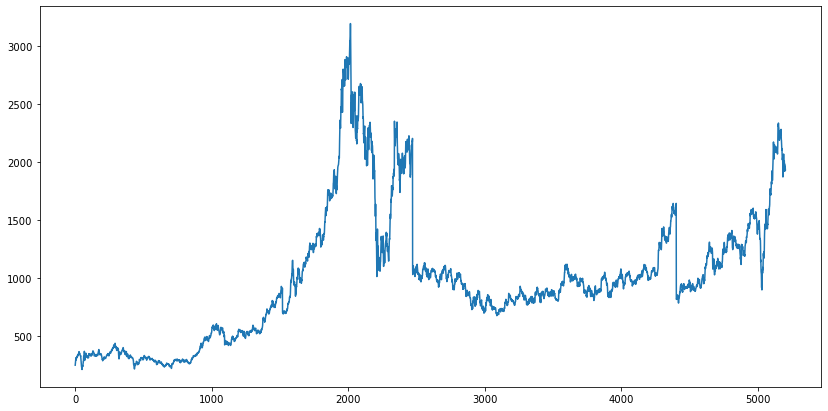

In [9]:
df.VWAP.plot(figsize=(14, 7))

<AxesSubplot:xlabel='VWAP', ylabel='Density'>

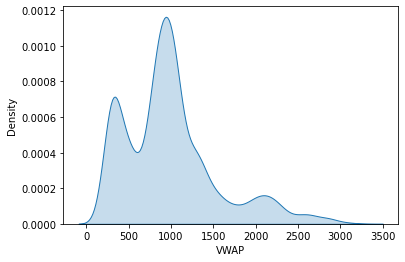

In [10]:
sns.kdeplot(df['VWAP'],shade=True)

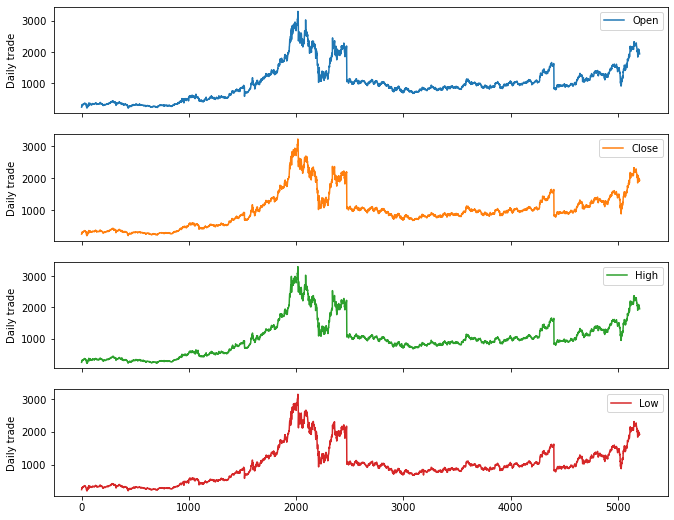

In [11]:
cols_plot = ['Open', 'Close', 'High','Low']
axes = df[cols_plot].plot(figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

In [12]:
scipy.stats.probplot(df.VWAP,plot=pylab)
pylab.show()

NameError: name 'scipy' is not defined

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

plt.rcParams.update({'figure.figsize': (10,10)})
y = df['VWAP'].to_frame()


# Multiplicative Decomposition 
result_mul = seasonal_decompose(y, model='multiplicative',period = 52)

# Additive Decomposition
result_add = seasonal_decompose(y, model='additive',period = 52)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

NameError: name 'plt' is not defined

In [14]:
df['vwap_diff']=df['VWAP']-df['VWAP'].shift(1)

<AxesSubplot:>

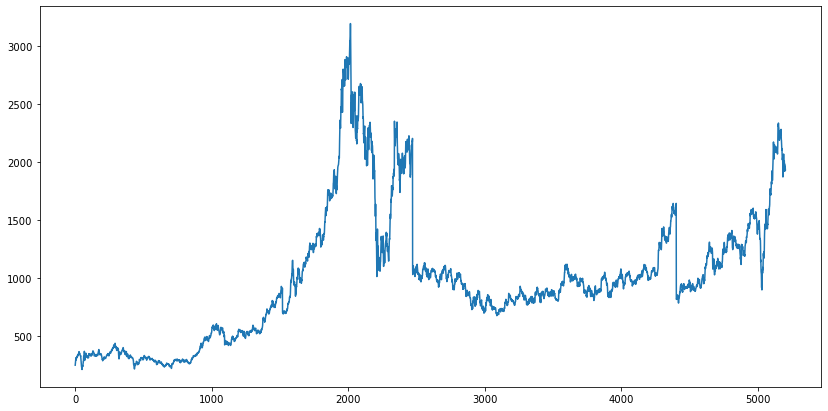

In [15]:
df.VWAP.plot(figsize=(14, 7))

<AxesSubplot:>

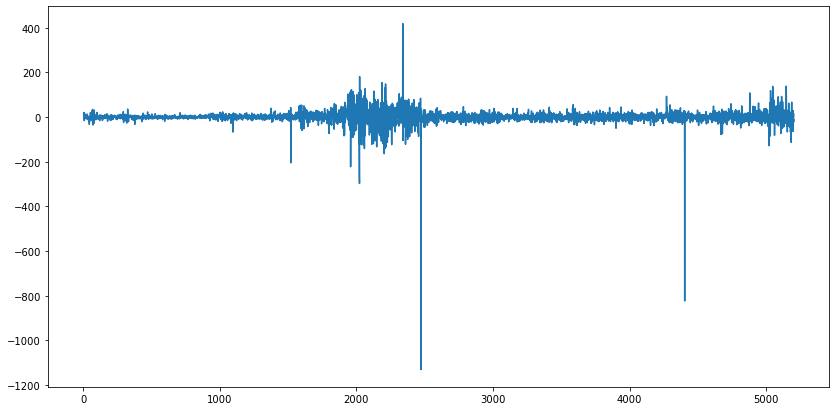

In [16]:
df.vwap_diff.plot(figsize=(14, 7))

In [17]:
df=df.reset_index()

In [18]:
lag_features = ["High", "Low", "Volume", "Turnover","Close"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df.fillna(df.mean(), inplace=True)

df.set_index("Date", drop=False, inplace=True)

In [19]:

df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df["month"] = df.Date.dt.month
df["week"] = df.Date.dt.week
df["day"] = df.Date.dt.day
df["day_of_week"] = df.Date.dt.dayofweek


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:

df_train = df[df.Date < "2019"]
df_valid = df[df.Date >= "2019"]

exogenous_features = ["High_mean_lag3", "High_std_lag3", "Low_mean_lag3", "Low_std_lag3",
                      "Volume_mean_lag3", "Volume_std_lag3", "Turnover_mean_lag3",
                      "Turnover_std_lag3","High_mean_lag7", "High_std_lag7", "Low_mean_lag7", "Low_std_lag7",
                      "Volume_mean_lag7", "Volume_std_lag7", "Turnover_mean_lag7",
                      "Turnover_std_lag7","High_mean_lag30", "High_std_lag30", "Low_mean_lag30", "Low_std_lag30",
                      "Volume_mean_lag30", "Volume_std_lag30", "Turnover_mean_lag30",
                      "Close_mean_lag3", "Close_mean_lag7","Close_mean_lag30","Close_std_lag3","Close_std_lag7","Close_std_lag30",
                      "Turnover_std_lag30","month","week","day","day_of_week"]


In [21]:
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 862 kB/s 
     |████████████████████████████████| 2.1 MB 4.4 MB/s 
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [22]:
from pmdarima import auto_arima
model = auto_arima(df_train.VWAP, exogenous=df_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df_train.VWAP, exogenous=df_train[exogenous_features])

forecast = model.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])
df_valid["Forecast_ARIMAX"] = forecast

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=46290.675, Time=15.77 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=46738.976, Time=10.46 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=46321.481, Time=7.56 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=46313.851, Time=8.31 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=82023.267, Time=7.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=46298.553, Time=11.39 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=46289.632, Time=8.77 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=46301.280, Time=8.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=46292.648, Time=8.25 sec


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=46874.844, Time=13.87 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=46288.087, Time=9.45 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=46289.953, Time=15.69 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=46291.462, Time=16.45 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=46285.966, Time=14.19 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=46290.549, Time=15.70 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=46287.817, Time=15.11 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=46287.696, Time=14.98 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=46287.322, Time=8.26 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=46289.353, Time=15.54 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0]          
Total fit time: 225.099 seconds


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4729
Model:               SARIMAX(3, 0, 0)   Log Likelihood              -23104.983
Date:                Mon, 15 Mar 2021   AIC                          46285.966
Time:                        09:58:05   BIC                          46531.502
Sample:                             0   HQIC                         46372.265
                               - 4729                                         
Covariance Type:                  opg                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
High_mean_lag3         -0.8909   1.87e-26  -4.76e+25      0.000      -0.891      -0.891
High_std_lag3           0.7719   2.33e-27   3.31e+26      0.000       0.772       0.772
Low_mean_lag3          -1.2222   2.12e-26  -5.76e+25      0.000      -1.222      -1.222
Low_std_lag3           -1.1259   1.96e-27  -5.74e+26      0.000      -1.126      -1.126
Volume_mean_lag3     8.575e-07   4.63e-23   1.85e+16      0.000    8.57e-07    8.57e-07
Volume_std_lag3     -4.798e-07   5.11e-23  -9.39e+15      0.000    -4.8e-07    -4.8e-07
Turnover_mean_lag3  -8.157e-15   3.78e-15     -2.158      0.031   -1.56e-14   -7.47e-16
Turnover_std_lag3    8.889e-15   4.72e-15      1.883      0.060   -3.62e-16    1.81e-14
High_mean_lag7          0.4016   1.74e-26   2.31e+25      0.000       0.402       0.402
High_std_lag7          -0.4405    1.2e-27  -3.66e+26      0.000      -0.440      -0.440
Low_mean_lag7          -0.5183   1.87e-26  -2.76e+25      0.000      -0.518      -0.518
Low_std_lag7           -0.1351   1.11e-27  -1.22e+26      0.000      -0.135      -0.135
Volume_mean_lag7     2.814e-06   4.45e-23   6.32e+16      0.000    2.81e-06    2.81e-06
Volume_std_lag7     -5.554e-07   3.69e-23  -1.51e+16      0.000   -5.55e-07   -5.55e-07
Turnover_mean_lag7  -5.878e-14   5.88e-15     -9.991      0.000   -7.03e-14   -4.73e-14
Turnover_std_lag7    1.931e-14   7.95e-15      2.428      0.015    3.72e-15    3.49e-14
High_mean_lag30        -0.8432   2.06e-26  -4.09e+25      0.000      -0.843      -0.843
High_std_lag30         -0.3192   6.04e-28  -5.29e+26      0.000      -0.319      -0.319
Low_mean_lag30         -0.5379   2.04e-26  -2.64e+25      0.000      -0.538      -0.538
Low_std_lag30          -0.6825   8.07e-28  -8.46e+26      0.000      -0.683      -0.683
Volume_mean_lag30   -1.845e-06   3.74e-23  -4.93e+16      0.000   -1.84e-06   -1.84e-06
Volume_std_lag30     -1.51e-06   6.65e-23  -2.27e+16      0.000   -1.51e-06   -1.51e-06
Turnover_mean_lag30  4.438e-14   4.25e-15     10.450      0.000    3.61e-14    5.27e-14
Close_mean_lag3         2.9287   2.05e-26   1.43e+26      0.000       2.929       2.929
Close_mean_lag7         0.3128   1.83e-26   1.71e+25      0.000       0.313       0.313
Close_mean_lag30        1.3708   2.04e-26   6.73e+25      0.000       1.371       1.371
Close_std_lag3         -0.3850   1.68e-27  -2.29e+26      0.000      -0.385      -0.385
Close_std_lag7          0.4713   9.53e-28   4.94e+26      0.000       0.471       0.471
Close_std_lag30         1.0054   6.81e-28   1.48e+27      0.000       1.005       1.005
Turnover_std_lag30   1.003e-14   8.11e-15      1.237      0.216   -5.86e-15    2.59e-14
month                   0.0364   2.47e-28   1.48e+26      0.000       0.036       0.036
week                   -0.0245    1.1e-27  -2.23e+25      0.000      -0.025      -0.025
day                     0.0368   3.37e-28   1.09e+26      0.000       0.037       0.037
day_of_week            -0.2416   7.41e-29  -3.26e+27      0.000      -0.2

<AxesSubplot:xlabel='Date'>

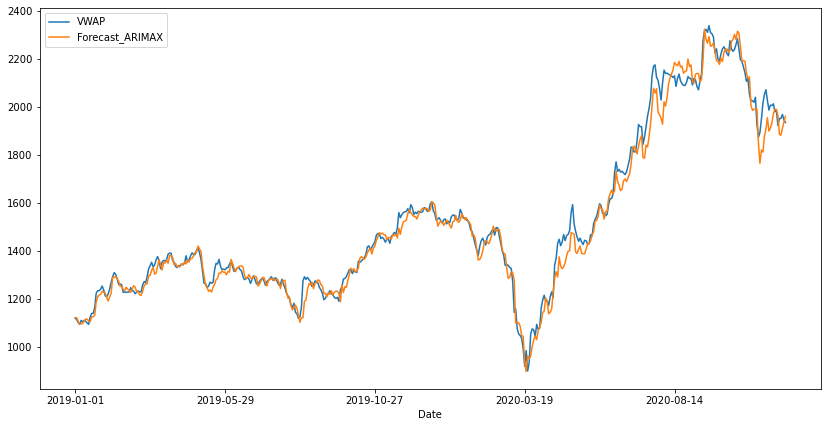

In [24]:
df_valid[["VWAP", "Forecast_ARIMAX"]].plot(figsize=(14, 7))

In [25]:
print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(df_valid.VWAP, df_valid.Forecast_ARIMAX)))
print("\nMAE of Auto ARIMAX:", mean_absolute_error(df_valid.VWAP, df_valid.Forecast_ARIMAX))

NameError: name 'mean_squared_error' is not defined